# cv2学习笔记2
## 形态学处理
- 形态学处理的核心就是定义结构元素getStructuringElement
### 定义结构元素cv2.getStructuringElement

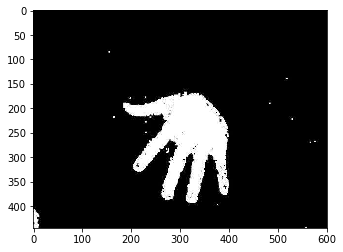

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [14]:
import cv2      
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/situ.st.1/Pictures/hand.jpg') 
 
plt.imshow(img,"gray")
plt.show()
np.set_printoptions(threshold='nan')
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) #十字形
print element
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) #椭圆
print element
#定义椭圆（MORPH_ELLIPSE）和十字形（MORPH_CROSS）长方形 (MORPH_RECT)结构

### 腐蚀cv2.erode
- 第一个参数是需要处理的图像，第二个是结构元素

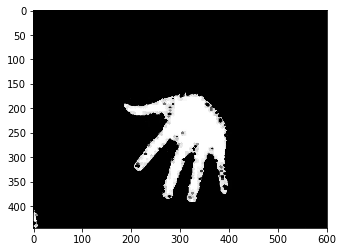

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5, 5))    
eroded = cv2.erode(img,kernel) 
 
plt.imshow(eroded,"gray")
plt.show()
#cv2.imshow("Eroded Image",eroded);
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  

### 膨胀cv2.dilate

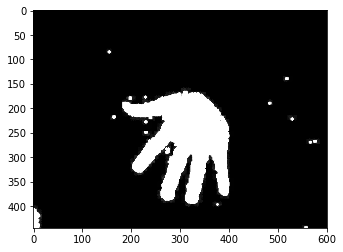

In [12]:
dilated = cv2.dilate(img,kernel)  

plt.imshow(dilated,"gray")
plt.show()
#cv2.imshow("Dilated Image",dilated);   
#cv2.imshow("Origin", img)  
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  

### 开运算和闭运算cv2.morphologyEx
- 开运算和闭运算就是将腐蚀和膨胀按照一定的次序进行处理。但这两者并不是可逆的，即先开后闭并不能得到原先的图像。
- 闭运算用来连接被误分为许多小块的对象，而开运算用于移除由图像噪音形成的斑点。
- 连续使用闭运算和开运算，将获得图像中的主要对象。
- 先用开运算后用闭运算，将消除图像中的噪声（即图像中的“小点”），不过这样也会消除一些破碎的对象。

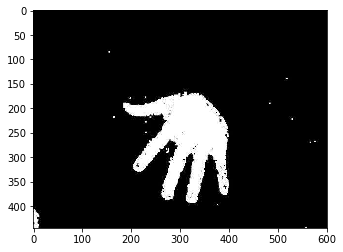

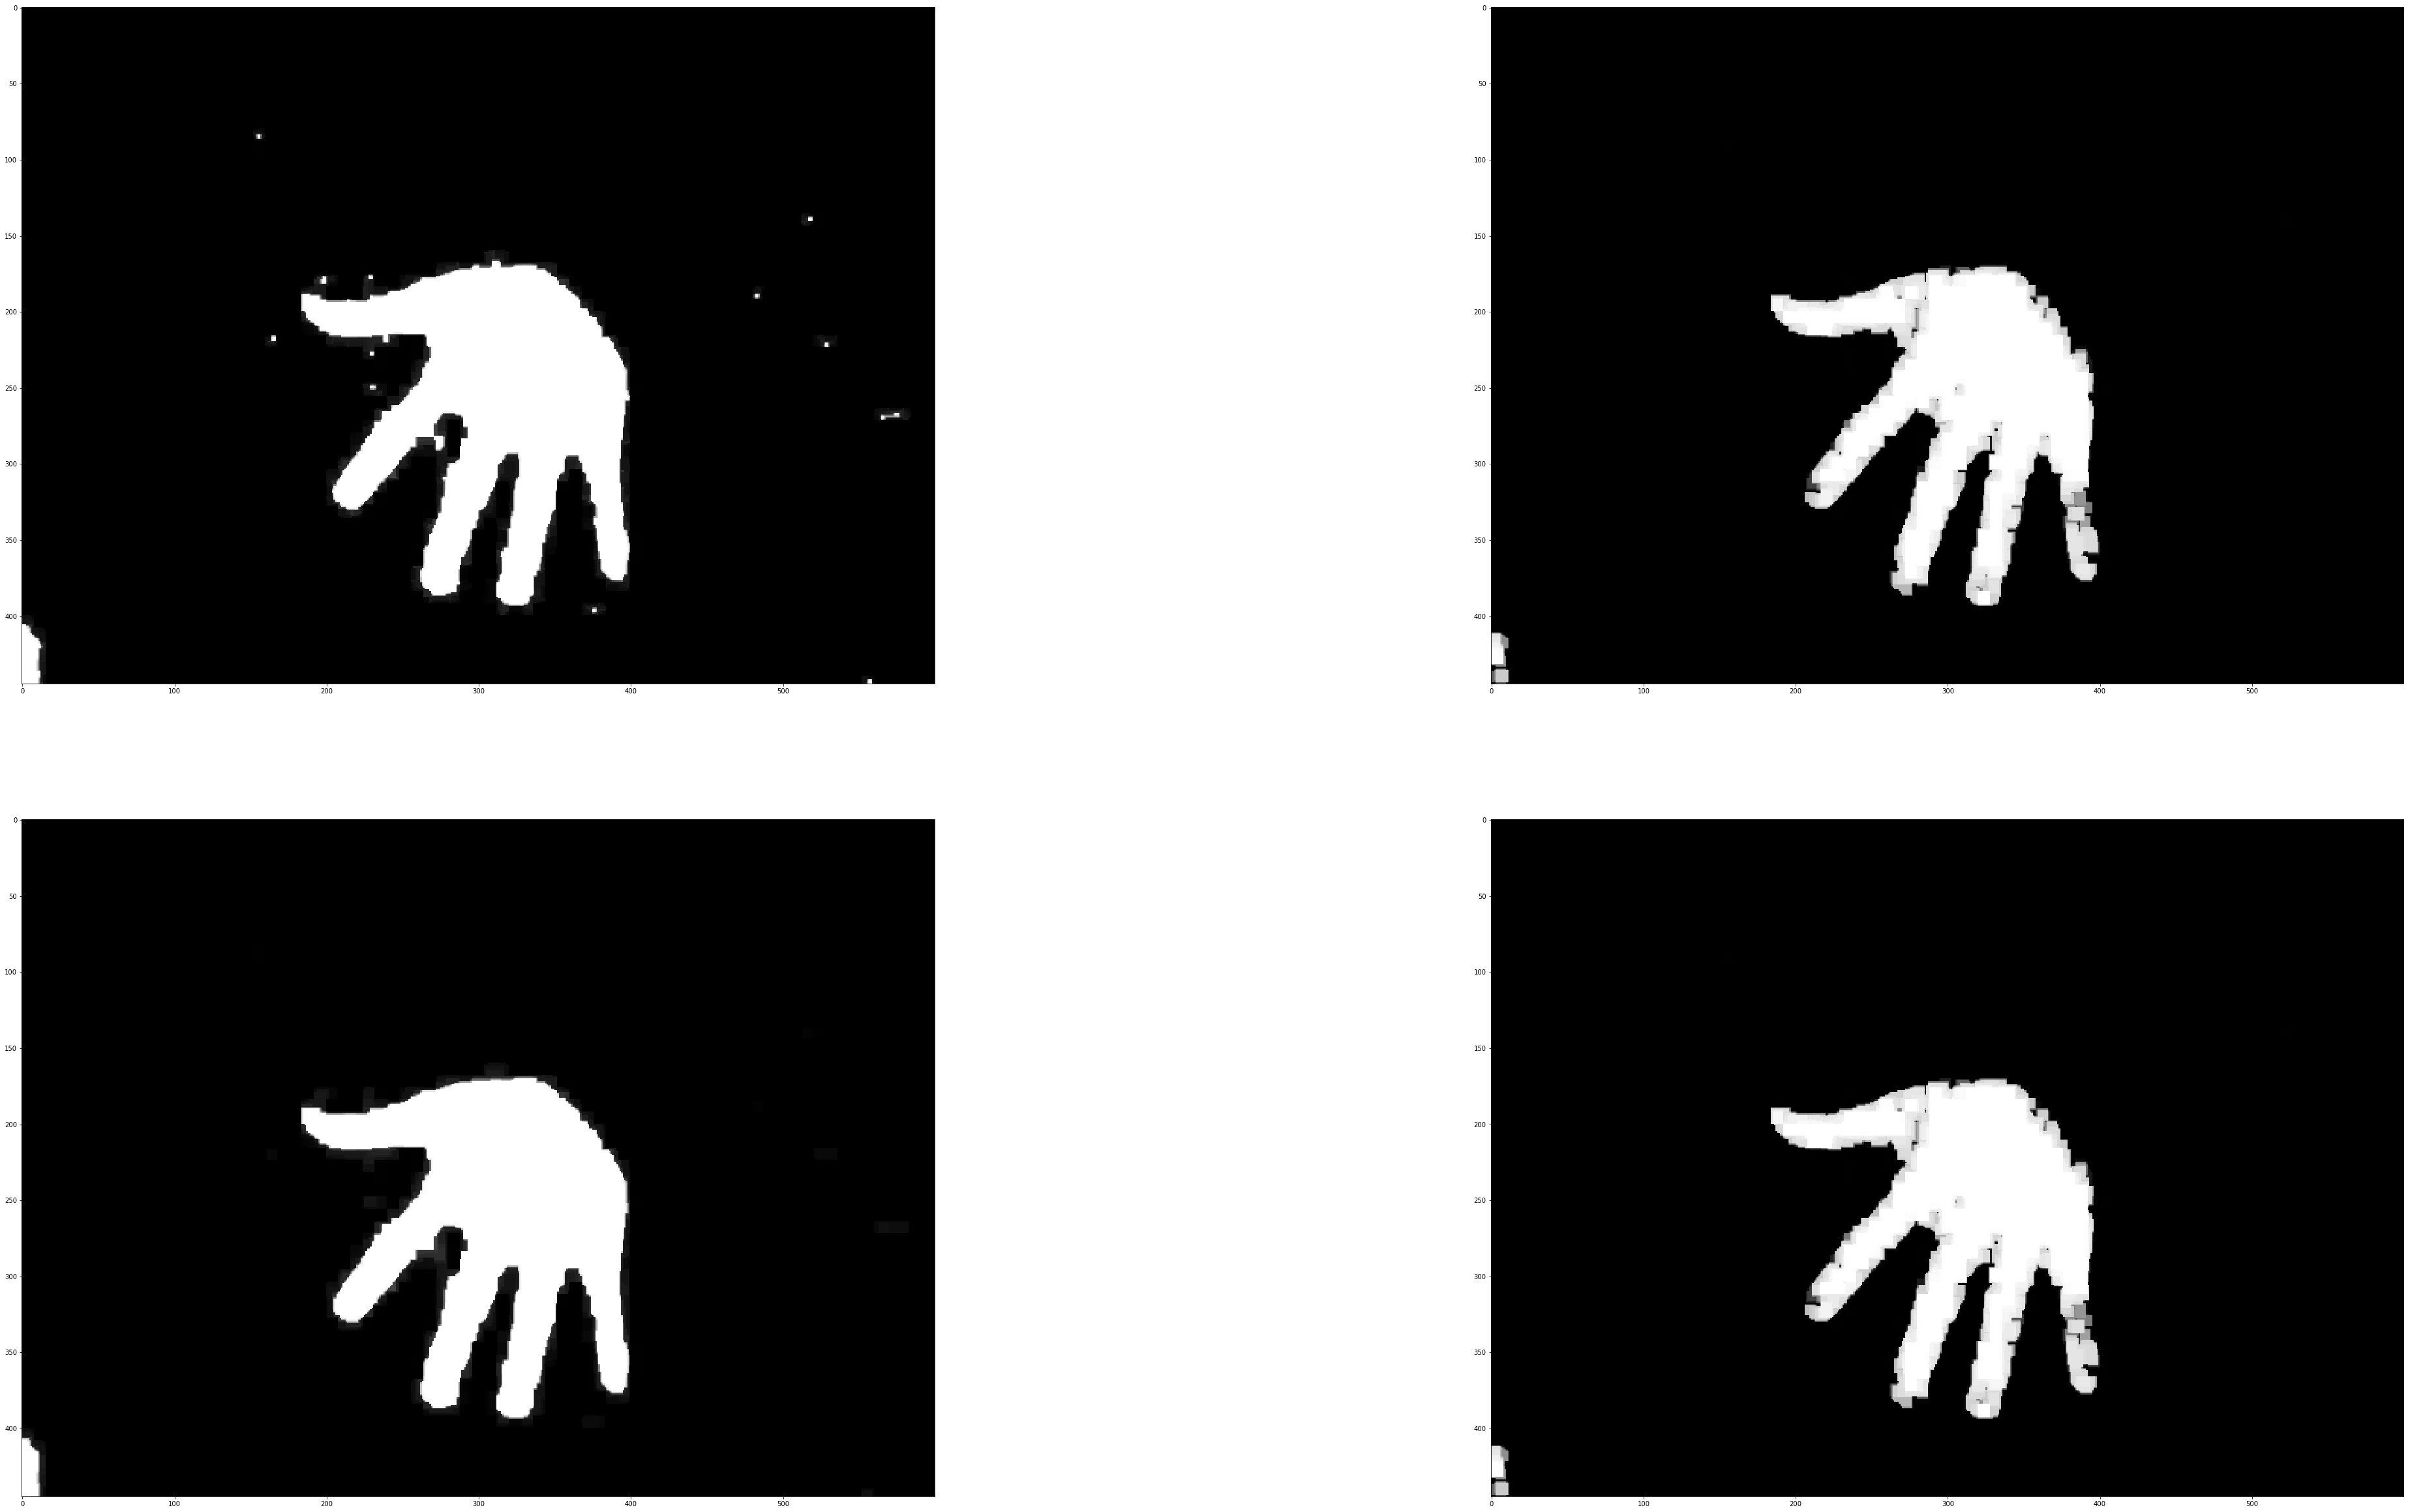

In [8]:
import cv2      
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/situ.st.1/Pictures/hand.jpg') 
plt.imshow(img,"gray")
plt.show()
#定义结构元素  
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7, 7))  
#闭运算  （先膨胀再腐蚀，修补主体小洞）
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)    
#开运算  （先腐蚀后膨胀，去除噪点） 
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  
#先闭后开（将获得图像中的主要对象）
close_open = cv2.morphologyEx(closed,cv2.MORPH_OPEN,kernel)         
#先开后闭（将消除图像中的噪声）
open_close = cv2.morphologyEx(opened,cv2.MORPH_OPEN,kernel)

plt.figure(figsize=(74,42)) 
plt.subplot(221),plt.imshow(closed,"gray")
plt.subplot(222),plt.imshow(opened,"gray")
plt.subplot(223),plt.imshow(close_open,"gray")
plt.subplot(224),plt.imshow(open_close,"gray")
plt.show()